## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# print(mouse_metadata.count())
# 
Clinical_results_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

Clinical_results_df.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of mice in the DataFrame.

print(Clinical_results_df['Mouse ID'].nunique())

249
249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedata = Clinical_results_df[Clinical_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicatedmice = duplicatedata["Mouse ID"].unique()
duplicatedmice

array(['g989'], dtype=object)

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_Clinical = Clinical_results_df[(Clinical_results_df['Mouse ID'] != "g989")]

Cleaned_Clinical.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
Cleaned_Clinical.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimenavg = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimenmed = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimenvar = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimenstd = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimensem = Cleaned_Clinical.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
regimenstats_df = pd.DataFrame({'Average Tumor Volume':regimenavg, 
                               'Tumor Volume Median':regimenmed, 
                               'Tumor Volume Variance':regimenvar,
                               'Tumor Volume Standard Deviation': regimenstd,
                               'Tumor Volume SEM': regimensem
                                }
                              )
regimenstats_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Average Tumor Volume,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


,Average Tumor Volume,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggs = ['mean','median','var','std','sem']
regimenstats_single_df = pd.DataFrame(Cleaned_Clinical.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':aggs}))
                      
regimenstats_single_df
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

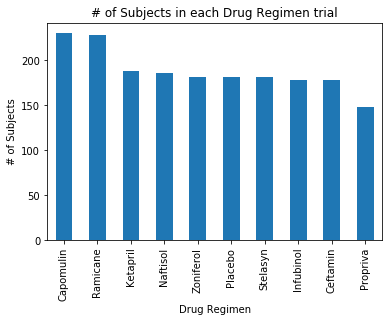

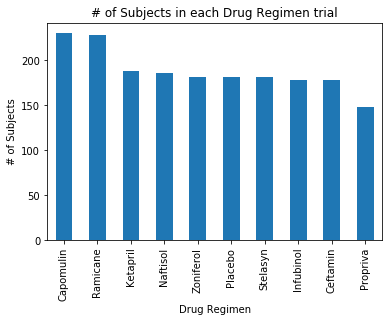

In [9]:
## Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
counts = Cleaned_Clinical['Drug Regimen'].value_counts()
counts.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel("# of Subjects")
plt.title('# of Subjects in each Drug Regimen trial')
plt.show()



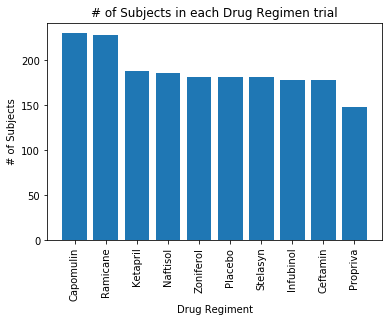

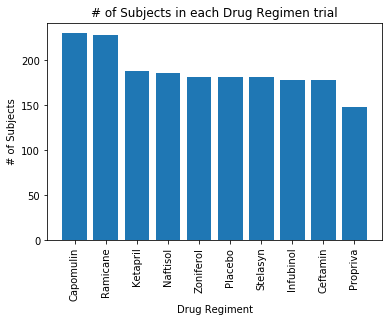

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(counts.index.values,counts.values)
plt.xlabel('Drug Regiment')
plt.ylabel('# of Subjects')
plt.title('# of Subjects in each Drug Regimen trial')
plt.xticks(rotation=90)
plt.show()

## Pie Plots

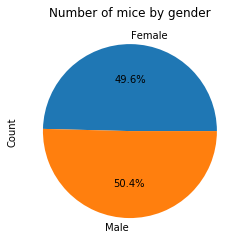

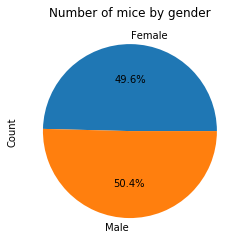

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_df = Cleaned_Clinical.groupby('Sex').nunique()
Sex_df.columns = ['Count', 'Timepoint','Tumor Volume (mm3)', 'Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']
Sex_df = Sex_df['Count']
plt.title('Number of mice by gender')
piechart = Sex_df.plot.pie(autopct='%1.1f%%')


Text(0.5, 1.0, 'Number of mice by gender')

Text(0.5, 1.0, 'Number of mice by gender')

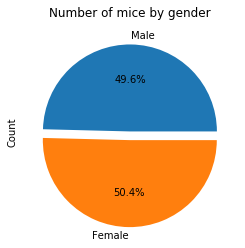

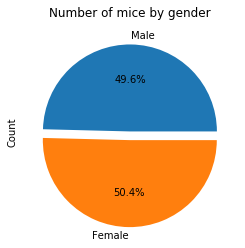

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode =[0,.1]
labels = "Male", "Female"
plt.pie(Sex_df, labels=labels, explode=explode, autopct='%1.1f%%')
plt.ylabel('Count')
plt.title('Number of mice by gender')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
finalTimepoint = Cleaned_Clinical.groupby(['Mouse ID'])['Timepoint'].max()
finalTimepoint = pd.DataFrame(finalTimepoint)
#merge with original data set into new finalTumorVolumeDF Data Frame
finalTumorVolumeDF = finalTimepoint.merge(Cleaned_Clinical, how='left', on=['Mouse ID','Timepoint'])

Capomulin_df = finalTumorVolumeDF.loc[finalTumorVolumeDF['Drug Regimen'] == 'Capomulin']
quartilesCap = Capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCap = quartilesCap[.25]
upperqCap = quartilesCap[.75]
iqrCap = upperqCap-lowerqCap
low_boundCap = lowerqCap - (iqrCap*1.5)
high_boundCap = upperqCap + (iqrCap*1.5)
loweroutliersCap = Capomulin_df.loc[Capomulin_df['Tumor Volume (mm3)'] <= low_boundCap]
upperoutliersCap = Capomulin_df.loc[Capomulin_df['Tumor Volume (mm3)'] >= high_boundCap]
outlierframesCap = len(loweroutliersCap + upperoutliersCap)



Ramicane_df = finalTumorVolumeDF.loc[finalTumorVolumeDF['Drug Regimen'] == 'Ramicane']
quartilesRam = Ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqRam = quartilesRam[.25]
upperqRam = quartilesRam[.75]
iqrRam = upperqRam-lowerqRam
low_boundRam = lowerqRam - (iqrRam*1.5)
high_boundRam = upperqRam + (iqrRam*1.5)
loweroutliersRam = Ramicane_df.loc[Ramicane_df['Tumor Volume (mm3)'] <= low_boundRam]
upperoutliersRam = Ramicane_df.loc[Ramicane_df['Tumor Volume (mm3)'] >= high_boundRam]
outlierframesRam = len(loweroutliersRam + upperoutliersRam)



Infubinol_df = finalTumorVolumeDF.loc[finalTumorVolumeDF['Drug Regimen'] == 'Infubinol']
Infubinol_df=Infubinol_df.reset_index(drop=True)
quartilesInf = Infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqInf = quartilesInf[.25]
upperqInf = quartilesInf[.75]
iqrInf = upperqInf-lowerqInf
low_boundInf = lowerqInf - (iqrInf*1.5)
high_boundInf = upperqInf + (iqrInf*1.5)
loweroutliersInf = Infubinol_df.loc[Infubinol_df['Tumor Volume (mm3)'] <= low_boundInf]
upperoutliersInf = Infubinol_df.loc[Infubinol_df['Tumor Volume (mm3)'] >= high_boundInf]
outlierframesInf = len(loweroutliersInf + upperoutliersInf)



Ceftamin_df = finalTumorVolumeDF.loc[finalTumorVolumeDF['Drug Regimen'] == 'Ceftamin']
Ceftamin_df=Ceftamin_df.reset_index()
quartilesCef = Ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCef = quartilesCef[.25]
upperqCef = quartilesCef[.75]
iqrCef = upperqCef-lowerqCef
low_boundCef = lowerqCef - (iqrCef*1.5)
high_boundCef = upperqCef + (iqrCef*1.5)
loweroutliersCef = Ceftamin_df.loc[Ceftamin_df['Tumor Volume (mm3)'] <= low_boundCef]
upperoutliersCef = Ceftamin_df.loc[Ceftamin_df['Tumor Volume (mm3)'] >= high_boundCef]
outlierframesCef = len(loweroutliersCef + upperoutliersCef)


frames = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
Success_df = pd.concat(frames)
Success_df


overallstats = pd.DataFrame({'Regimen':['Capomulin', 'Ramicane','Infubinol','Ceftamin'],
                'lower quartile':  [lowerqCap, lowerqRam, lowerqInf, lowerqCef],
                'upper quartile': [upperqCap, upperqRam, upperqInf, upperqCef],
                'iqr':[iqrCap, iqrRam, iqrInf, iqrCef],
                'lower bound':[low_boundCap, low_boundRam, low_boundInf, low_boundCef],
                'upper bound':[high_boundCap, high_boundRam, high_boundInf, high_boundCef]
               })

print(f"There are {outlierframesCap} in the Capomulin trial")
print(f"There are {outlierframesRam} in the Ramicane trial")
print(f"There are {outlierframesInf} in the Infubinol trial")
print(f"There are {outlierframesCef} in the Ceftamin trial")

print(f"The outlier is mouse {loweroutliersInf['Mouse ID']}")

overallstats


There are 0 in the Capomulin trial
There are 0 in the Ramicane trial
There are 1 in the Infubinol trial
There are 0 in the Ceftamin trial
The outlier is mouse 5    c326
Name: Mouse ID, dtype: object


,Regimen,lower quartile,upper quartile,iqr,lower bound,upper bound
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


There are 0 in the Capomulin trial
There are 0 in the Ramicane trial
There are 1 in the Infubinol trial
There are 0 in the Ceftamin trial
The outlier is mouse 5    c326
Name: Mouse ID, dtype: object


,Regimen,lower quartile,upper quartile,iqr,lower bound,upper bound
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


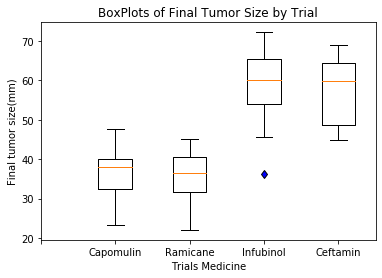

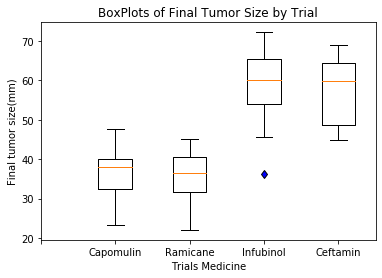

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Capomulin_df['Tumor Volume (mm3)'], Ramicane_df['Tumor Volume (mm3)'], Infubinol_df['Tumor Volume (mm3)'], Ceftamin_df['Tumor Volume (mm3)']]
trials=('','Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
x = np.arange(5)
blueoutliers = dict(markerfacecolor='b', marker='d')
fig1, ax = plt.subplots()
ax.boxplot(data,flierprops=blueoutliers)
plt.xlabel('Trials Medicine')
plt.ylabel('Final tumor size(mm)')
plt.title('BoxPlots of Final Tumor Size by Trial')
plt.xticks(x,trials)


plt.show()

# Line and Scatter Plots

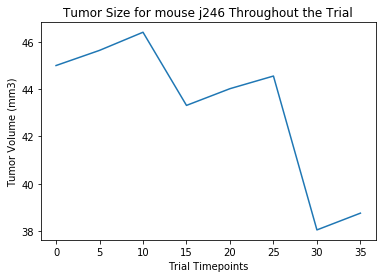

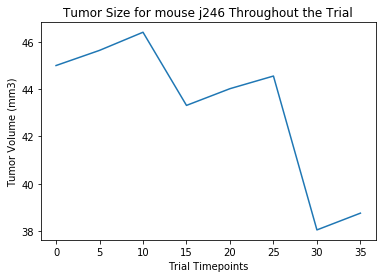

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = Clinical_results_df[(Clinical_results_df['Drug Regimen'] == "Capomulin")]
Capomulinj246 = Capomulin[(Capomulin['Mouse ID'] == "j246")]
Capomulinline = Capomulinj246[['Timepoint', 'Tumor Volume (mm3)']]
Capomulinline = Capomulinline.reset_index(drop = True)
x_values = Capomulinline['Timepoint']
y_values = Capomulinline['Tumor Volume (mm3)']
plt.plot(x_values, y_values)
plt.xlabel('Trial Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Size for mouse j246 Throughout the Trial')
plt.show()

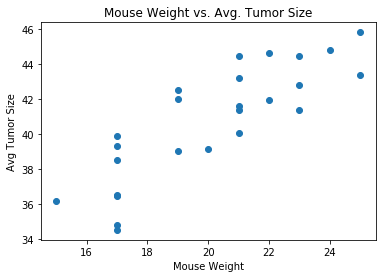

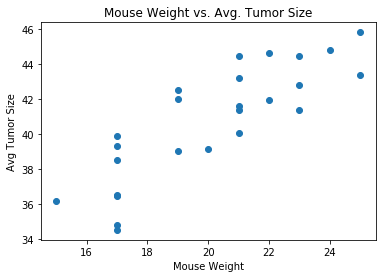

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capavgtumor = pd.DataFrame(Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
weight = Capomulin.groupby('Mouse ID')['Weight (g)'].median()
Capavgtumor['Weight'] = weight
Capavgtumor = Capavgtumor.reset_index()
x=Capavgtumor['Weight']
y=Capavgtumor['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Size')
plt.title('Mouse Weight vs. Avg. Tumor Size')
plt.show()

## Correlation and Regression

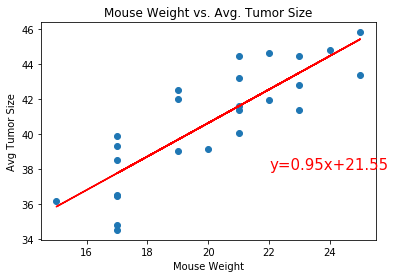

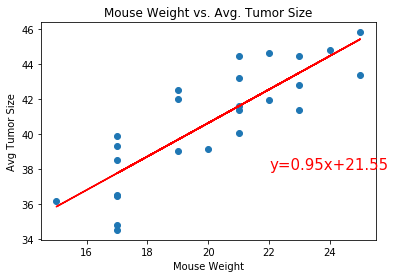

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y=' + str(round(slope,2)) +'x+' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(22,38),fontsize=15, color='red')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Size')
plt.title('Mouse Weight vs. Avg. Tumor Size')
plt.show()